In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

In [4]:
url='https://www.mecca.com/en-nz/skincare/?sort=best-sellers'

In [5]:
respond = requests.get(url)
print(respond)

<Response [200]>


In [6]:
response = respond.content

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><title>Skincare | Shop Skin Care Products Online | MECCA New Zealand</title><meta content="Shop MECCA's wide range of skincare products online, from our curated collection of iconic brands, for your best skin yet. Free delivery on orders over $25." name="description"/><link href="https://www.mecca.com/en-nz/skincare/" rel="canonical"/><link href="https://www.mecca.com/en-au/skincare/?sort=best-sellers" hreflang="x-default" rel="alternate"/><link href="https://www.mecca.com/en-au/skincare/?sort=best-sellers" hreflang="en-au" rel="alternate"/><link href="https://www.mecca.com/en-nz/skincare/?sort=best-sellers" hreflang="en-nz" rel="alternate"/><script id="product-list-schema" type="application/ld+json">{"@context":"https://schema.org","@type":"ItemList","itemListElement":[{"@type":"ListItem","position":1,"url":"/en-nz/summer-fridays/lip-butter-balm-V-066238/?cgpath=skincare"},
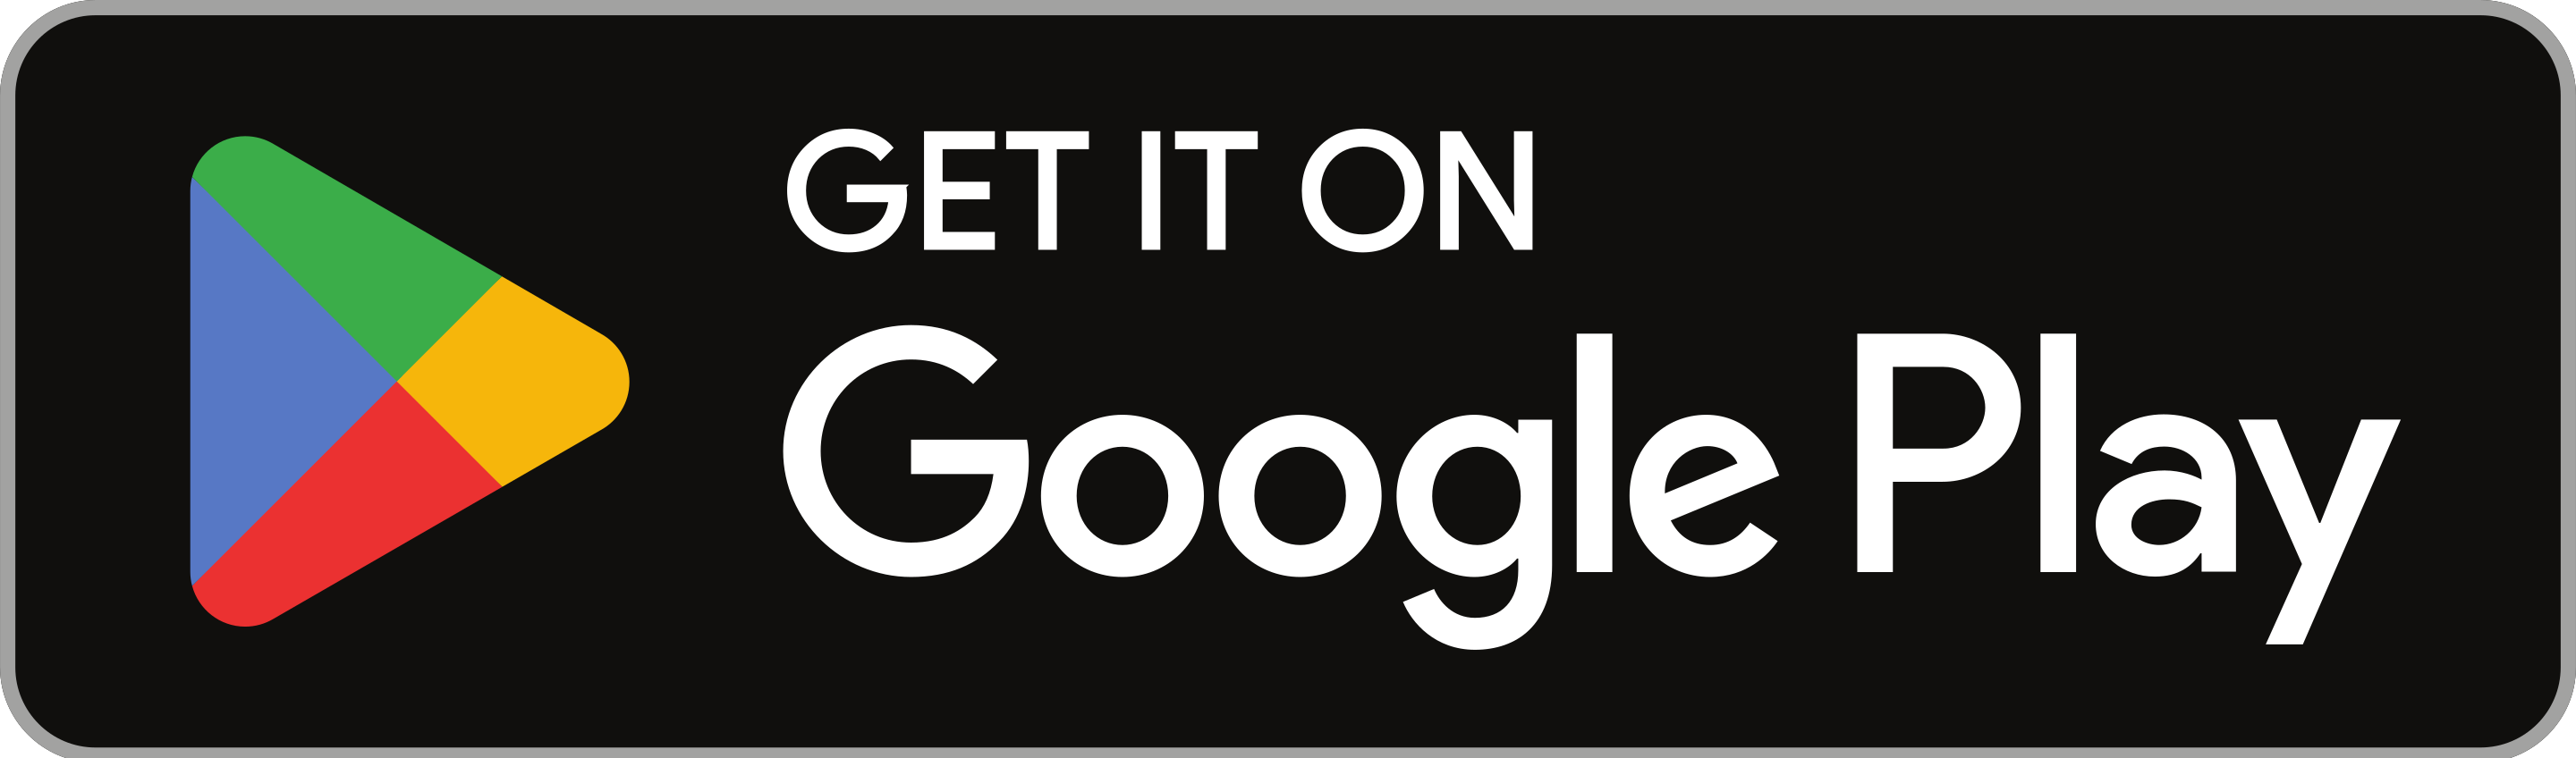

In [7]:
soup= BeautifulSoup(response, 'html.parser')
soup

In [8]:
table=soup.find('div',{'class':'css-17b0w3j'})
table

<div class="css-17b0w3j"><style data-emotion="css yy6ajo">.css-yy6ajo{background:#FFFFFF;display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-box-flex-flow:column nowrap;-webkit-flex-flow:column nowrap;-ms-flex-flow:column nowrap;flex-flow:column nowrap;-webkit-flex-direction:column-reverse;-ms-flex-direction:column-reverse;flex-direction:column-reverse;margin-bottom:5rem;min-width:100%;position:relative;width:10.9rem;}@media (min-width: 768px){.css-yy6ajo{width:100%;}}@media (min-width: 1280px){.css-yy6ajo{width:100%;}}@media (min-width: 1800px){.css-yy6ajo{width:23rem;}}</style><div class="css-yy6ajo" data-testid="ProductTile"><style data-emotion="css 1r7iqog">.css-1r7iqog{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-box-flex-flow:column nowrap;-webkit-flex-flow:column nowrap;-ms-flex-flow:column nowrap;flex-flow:column nowrap;overflow-wrap:break-word;width:100%;}</style><div class="css-1r7iqog"><style data-emotion="cs

In [9]:
products=table.find_all('div', {'class':'css-yy6ajo'})
products

[<div class="css-yy6ajo" data-testid="ProductTile"><style data-emotion="css 1r7iqog">.css-1r7iqog{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-box-flex-flow:column nowrap;-webkit-flex-flow:column nowrap;-ms-flex-flow:column nowrap;flex-flow:column nowrap;overflow-wrap:break-word;width:100%;}</style><div class="css-1r7iqog"><style data-emotion="css cfm1ok">.css-cfm1ok{font-size:1.3rem;line-height:2rem;-webkit-box-orient:vertical;display:-webkit-box;font-weight:600;-webkit-line-clamp:1;margin:0;overflow:hidden;padding-top:0.8rem;text-overflow:ellipsis;}@media (min-width: 1024px){.css-cfm1ok{font-size:1.3rem;line-height:2rem;}}</style><p class="css-cfm1ok">Summer Fridays</p><style data-emotion="css mijcyd">.css-mijcyd{all:unset;-webkit-box-orient:vertical;display:-webkit-box;height:3.8rem;-webkit-line-clamp:2;margin:0.2rem 0 0 0;overflow:hidden;overflow-wrap:break-word;text-overflow:ellipsis;}.css-mijcyd:hover{cursor:pointer;-webkit-text-decoration:und

In [10]:
skincare=[]
for product in products:
    # Extracting product name
    product_name = product.find('p',class_='css-cfm1ok')
    product_name=product_name.text

    # Extracting function
    function=product.find('a',class_='css-mijcyd')
    function=function.text

    # Extracting price
    price = product.find('p',class_='css-15zvubz')
    price=price.text

    # Extracting rating
    rating_value = product.find('div', class_='css-u7ec74')
    pattern = r'width="(\d+(\.\d*)?)"'
    rating_string = str(rating_value)
    matches = re.findall(pattern, rating_string)
    rating = [match[0] for match in matches]
    if len(rating) > 10: # Check if the list is long enough
                rating=rating[10]
    else:
                rating = "N/A" # Handle the case where the list is too short

    # Extracting review counts
    matches2 = re.findall(r'<span>\(<!-- -->(\d+)<!-- -->\)</span>', rating_string)
    review_counts = matches2[0]

    print(product_name)
    print(function)
    print(price)
    print(rating)
    print(review_counts)

    skincare.append([product_name,function, price,rating,review_counts]) # Append a list of product details

print(skincare)

Summer Fridays
Lip Butter Balm
$45.00
86
77
Emma Lewisham
Supernatural Vitale Face Elixir
$148.00 - $158.00
91
118
MECCA COSMETICA
To Save Face SPF50+ Superscreen
$24.00 - $51.00
94
2324
MECCA COSMETICA
To Save Face SPF50+ Superscreen
$51.00
94
2324
Tatcha
The Dewy Skin Cream
$41.00 - $127.00
86
204
Kiehl's
Ultra Facial Cream
$72.00 - $121.00
97
2599
Emma Lewisham
Supernatural Face Crème Riche
$148.00 - $158.00
95
360
Emma Lewisham
Skin Reset Serum
$58.00 - $152.00
85
160
Glow Recipe
Watermelon Glow Niacinamide Dew Drops™
$37.00 - $65.00
95
1722
Glow Recipe
Watermelon Glow PHA+BHA Pore-Tight Toner
$30.00 - $65.00
96
2730
MECCA COSMETICA
Hydrating Moisturiser
$60.00
86
534
Glow Recipe
Watermelon Glow PHA+BHA Pore-Tight Toner
$65.00
96
2730
Drunk Elephant
Lala Retro™ Whipped Cream
$37.00 - $112.00
90
2140
Frank Body
Glycolic Body Scrub
$13.00 - $30.00
96
42
MECCA MAX
SPOT DOTS Blemish Busting Patches
$11.00 - $29.00
90
571
Dr. Jart+
Cicapair Tiger Grass Colour Correcting Treatment
$37.00

In [11]:
df=pd.DataFrame(skincare,columns=['product_name','function','price','rating','review_counts'])
df.head()

,product_name,function,price,rating,review_counts
0,Summer Fridays,Lip Butter Balm,$45.00,86,77
1,Emma Lewisham,Supernatural Vitale Face Elixir,$148.00 - $158.00,91,118
2,MECCA COSMETICA,To Save Face SPF50+ Superscreen,$24.00 - $51.00,94,2324
3,MECCA COSMETICA,To Save Face SPF50+ Superscreen,$51.00,94,2324
4,Tatcha,The Dewy Skin Cream,$41.00 - $127.00,86,204


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   48 non-null     object
 1   function       48 non-null     object
 2   price          48 non-null     object
 3   rating         48 non-null     object
 4   review_counts  48 non-null     object
dtypes: object(5)
memory usage: 2.0+ KB


In [13]:
def extract_price(price):
  # choose the last price in the price range
    if '-' in price:
        return price.split(' - ')[-1]
    else:
        return price

# apply the function
df['price'] = df['price'].apply(extract_price)
df.head()

,product_name,function,price,rating,review_counts
0,Summer Fridays,Lip Butter Balm,$45.00,86,77
1,Emma Lewisham,Supernatural Vitale Face Elixir,$158.00,91,118
2,MECCA COSMETICA,To Save Face SPF50+ Superscreen,$51.00,94,2324
3,MECCA COSMETICA,To Save Face SPF50+ Superscreen,$51.00,94,2324
4,Tatcha,The Dewy Skin Cream,$127.00,86,204


In [14]:
# drop the $ sign
df['price'] = df['price'].str.replace('$', '').astype(float)
df.head()

,product_name,function,price,rating,review_counts
0,Summer Fridays,Lip Butter Balm,45.0,86,77
1,Emma Lewisham,Supernatural Vitale Face Elixir,158.0,91,118
2,MECCA COSMETICA,To Save Face SPF50+ Superscreen,51.0,94,2324
3,MECCA COSMETICA,To Save Face SPF50+ Superscreen,51.0,94,2324
4,Tatcha,The Dewy Skin Cream,127.0,86,204


In [15]:
# Convert 'rating' and 'review_counts' columns to integers
df['rating'] = df['rating'].replace('N/A', 0).astype(int)
df['review_counts'] = df['review_counts'].replace('N/A', 0).astype(int)
df.dtypes

product_name      object
function          object
price            float64
rating             int64
review_counts      int64
dtype: object

In [16]:
df.head()

,product_name,function,price,rating,review_counts
0,Summer Fridays,Lip Butter Balm,45.0,86,77
1,Emma Lewisham,Supernatural Vitale Face Elixir,158.0,91,118
2,MECCA COSMETICA,To Save Face SPF50+ Superscreen,51.0,94,2324
3,MECCA COSMETICA,To Save Face SPF50+ Superscreen,51.0,94,2324
4,Tatcha,The Dewy Skin Cream,127.0,86,204


In [17]:
# Check for duplicated columns
duplicated_columns = df.columns[df.columns.duplicated()]

if len(duplicated_columns) > 0:
    print(f"The following columns are duplicated: {', '.join(duplicated_columns)}")
else:
    print("No duplicated columns found.")

# Optionally, drop duplicated columns
if len(duplicated_columns) > 0:
    df = df.loc[:, df.columns.duplicated()]
df

No duplicated columns found.


,product_name,function,price,rating,review_counts
0,Summer Fridays,Lip Butter Balm,45.0,86,77
1,Emma Lewisham,Supernatural Vitale Face Elixir,158.0,91,118
2,MECCA COSMETICA,To Save Face SPF50+ Superscreen,51.0,94,2324
3,MECCA COSMETICA,To Save Face SPF50+ Superscreen,51.0,94,2324
4,Tatcha,The Dewy Skin Cream,127.0,86,204
5,Kiehl's,Ultra Facial Cream,121.0,97,2599
6,Emma Lewisham,Supernatural Face Crème Riche,158.0,95,360
7,Emma Lewisham,Skin Reset Serum,152.0,85,160
8,Glow Recipe,Watermelon Glow Niacinamide Dew Drops™,65.0,95,1722
9,Glow Recipe,Watermelon Glow PHA+BHA Pore-Tight Toner,65.0,96,2730


In [19]:
df.isnull().sum()

product_name     0
function         0
price            0
rating           0
review_counts    0
dtype: int64

In [18]:
df.to_csv('/content/drive/MyDrive/612 course/612 assessment 1/Mecca_skincare.csv', index=False)